In [31]:
import shutil
import os
import glob
import geopandas as gpd
import pandas as pd
import rtree
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
os.chdir('/Users/marianawebb/Documents/Nevada/SW_CASC/')
os.getcwd()

'/Users/marianawebb/Documents/Nevada/SW_CASC'

In [79]:
#read in burn boundaries
burn_shp = gpd.read_file("data/MTBS/MTBS_BurnBoundaries/mtbs_perims_DD.shp")

#set crs of shp to match watershed crs
burn_shp = burn_shp.to_crs('EPSG:4326').to_crs({'proj':'cea'})


<AxesSubplot: >

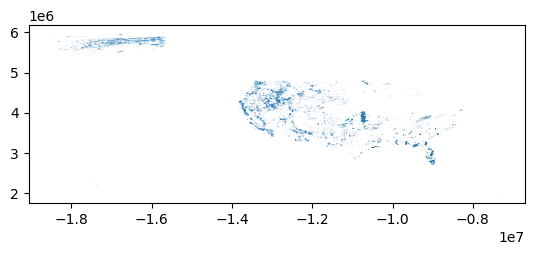

In [80]:
burn_shp.plot()

In [81]:
#read in watershed shp files
watersheds_shp = gpd.read_file("data/HUCs/sw_huc8_clean.shp") 

watersheds_shp['huc8'] = watersheds_shp['huc8'].astype('int64') #set huc ID attribute as int for matching
watersheds_shp = watersheds_shp.to_crs('EPSG:4326').to_crs({'proj':'cea'}) #convert to crs same as burn boundaries
watersheds_shp['tot_area'] = watersheds_shp.area #calculate watershed area and save as attribute
watersheds_shp

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc8,name,shape_Leng,shape_Area,ObjectID,layer,path,geometry,tot_area
0,{F88B4D9A-7C80-4FA7-A3C3-FFFFD2C7B41C},None,None,None,None,2020-06-04,None,608339.91,2461.87,UT,16020303,Tule Valley,3.279864,0.257096,2,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-12635311.842 4056213.754, -12634997...",2.461864e+09
1,{F08762FD-10B0-4D76-B388-EA773C06C23A},None,None,None,None,2020-06-04,None,1118676.10,4527.13,UT,16020310,Great Salt Lake,6.955759,0.485716,3,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-12561275.806 4222808.683, -12561262...",4.527122e+09
2,{BC8E7A7F-C2B3-4B9F-A386-F41863B8AB9B},None,None,None,None,2020-06-04,None,893020.66,3613.93,UT,16030009,Sevier Lake,4.414013,0.374731,4,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-12614583.906 4022302.460, -12614562...",3.613926e+09
3,{08DCF3AF-261F-46A9-9628-0F17C5823D2A},None,None,None,None,2020-06-04,None,810819.31,3281.27,"ID,UT",16010201,Bear Lake,4.380215,0.358029,6,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-12428401.869 4317684.996, -12428359...",3.281269e+09
4,{05F97963-7BF4-40BB-9668-F40029C826E5},None,None,None,None,2020-06-04,None,524613.55,2123.04,"ID,UT,WY",16010102,Central Bear,3.077417,0.231610,7,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-12328625.866 4297440.696, -12328518...",2.123036e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,{798D4E37-E5B7-4D38-94BE-6B9DAF33D19A},None,None,None,None,2020-06-04,None,1205650.78,4879.10,"NM,TX",12080006,Sulphur Springs Draw,7.122362,0.470091,75,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-11518341.734 3507646.430, -11518286...",4.879096e+09
458,{293FE72B-DEB3-4DDC-8E40-2EE1FFBEF80C},None,None,None,None,2020-06-04,None,116978.75,473.40,"MX,NM",15080303,Cloverdale,1.188801,0.044890,76,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-12112705.636 3314265.120, -12112663...",4.733962e+08
459,{92491071-FD30-4CA2-BB44-3F2C24CA4AE5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},None,U.S. Geological Survey,None,2022-01-18,None,3532103.30,14293.93,"MX,NM,TX",13030102,El Paso-Las Cruces,10.716424,1.359379,83,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-11934088.448 3450719.335, -11934006...",1.429391e+10
460,{8EE47EC0-EC28-4764-81DB-81FB752A9483},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},None,U.S. Geological Survey,None,2022-01-18,None,1987062.42,8041.36,"MX,NM,TX",13040100,Rio Grande-Fort Quitman,5.130459,0.762956,84,WBDHU8,/Users/marianawebb/Documents/Nevada/SW_CASC/da...,"POLYGON ((-11844256.988 3360899.919, -11844222...",8.041357e+09


In [82]:
#intersect burn and watershed geometries, returning overlapping areas
watershed_burn = watersheds_shp.overlay(burn_shp, how='intersection')

#get area of intersection
watershed_burn['fireIntersect_area'] = watershed_burn.area

#get percentage of watershed area burned
watershed_burn['burn_percentage'] = watershed_burn['fireIntersect_area']/watershed_burn['tot_area']*100

watershed_burn.sort_values('burn_percentage', ascending=False)

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,...,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry,fireIntersect_area,burn_percentage
5593,{D8C2533A-37E8-4938-AB56-F2B6404DD18C},{52E8C095-D009-4739-A081-3EBDDA0B550D},None,U.S. Geological Survey,None,2022-01-02,None,214555.79,868.28,CA,...,32,-970,-150,100,300,700,Used modified GeoMac perimeter.,"MULTIPOLYGON (((-13296235.388 3602525.323, -13...",5.887315e+08,6.780461e+01
6224,{6DC12841-C118-4FE2-95D0-057031EC5930},None,None,None,None,2012-06-11,None,482180.71,1951.32,CA,...,34,-970,-150,110,309,550,"CA4012512307320200818, CA4008712298420200819, ...","MULTIPOLYGON (((-13687477.639 4066253.037, -13...",1.213837e+09,6.220608e+01
4588,{293FE72B-DEB3-4DDC-8E40-2EE1FFBEF80C},None,None,None,None,2020-06-04,None,116978.75,473.40,"MX,NM",...,-9999,9999,9999,17,-9999,-9999,Large fire with indistinct boundaries. Poor im...,"POLYGON ((-12112663.792 3314264.511, -12112611...",2.849986e+08,6.020297e+01
5693,{E21964A7-43CE-4343-B879-583EB3C179E8},{A0039473-A809-4129-8E12-32F32F5B835C},None,U.S. Geological Survey,None,2022-01-03,None,418708.46,1694.45,CA,...,43,-970,-150,90,296,540,None,"MULTIPOLYGON (((-13595210.008 3958623.567, -13...",7.974126e+08,4.706018e+01
5746,{A3897E42-3682-4035-B7AA-BD349A3ED74C},None,None,None,None,2020-03-30,None,633607.92,2564.12,"CA,OR",...,-9999,-970,-150,125,330,580,North end cut off due to scene edge,"MULTIPOLYGON (((-13783039.270 4298772.870, -13...",1.143361e+09,4.459075e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,{CC61820E-2F90-4E9B-AE46-4C877CBC53FB},None,None,None,None,2020-06-04,None,885080.83,3581.80,"AZ,MX,NM",...,0,-970,-150,50,9999,9999,Fire perimeter reshaped to edit/exclude overla...,"POLYGON ((-12127551.940 3297713.738, -12127560...",5.326154e+01,1.487007e-06
3693,{A66D7770-F6C9-4C7E-A9B9-5AF6AF0F3906},None,None,None,None,2012-06-11,None,1378392.91,5578.16,AZ,...,-9999,-970,-150,-25,175,9999,Fire perimeter was difficult to delineate not...,"POLYGON ((-12590110.961 3717614.392, -12590103...",5.882069e+01,1.054482e-06
2659,{C5522FCB-EBE4-4AC1-8A98-764F98A4B252},None,None,None,None,2013-01-18,None,1373486.71,5558.31,"NV,OR",...,-9999,-970,-150,75,147,275,None,"POLYGON ((-13222404.428 4267510.389, -13222400...",3.949747e+01,7.106031e-07
5271,{8793F8E0-D35A-4E65-ABBB-FBFA84D43675},None,None,None,None,2018-10-01,None,993494.16,4020.53,"CA,MX",...,-9999,-970,-150,50,254,490,None,"POLYGON ((-12966962.981 3449339.118, -12966963...",3.726356e+00,9.268325e-08


In [83]:
#convert to data frame
burn_df = pd.DataFrame(watershed_burn)
print(burn_df.columns)
burn_df

Index(['tnmid', 'metasource', 'sourcedata', 'sourceorig', 'sourcefeat',
       'loaddate', 'referenceg', 'areaacres', 'areasqkm', 'states', 'huc8',
       'name', 'shape_Leng', 'shape_Area', 'ObjectID', 'layer', 'path',
       'tot_area', 'Event_ID', 'irwinID', 'Incid_Name', 'Incid_Type', 'Map_ID',
       'Map_Prog', 'Asmnt_Type', 'BurnBndAc', 'BurnBndLat', 'BurnBndLon',
       'Ig_Date', 'Pre_ID', 'Post_ID', 'Perim_ID', 'dNBR_offst', 'dNBR_stdDv',
       'NoData_T', 'IncGreen_T', 'Low_T', 'Mod_T', 'High_T', 'Comment',
       'geometry', 'fireIntersect_area', 'burn_percentage'],
      dtype='object')


,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,...,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry,fireIntersect_area,burn_percentage
0,{F88B4D9A-7C80-4FA7-A3C3-FFFFD2C7B41C},None,None,None,None,2020-06-04,None,608339.91,2461.87,UT,...,-9999,-970,-150,100,223,400,None,"POLYGON ((-12623924.098 4021651.612, -12623884...",6.800525e+06,0.276235
1,{F88B4D9A-7C80-4FA7-A3C3-FFFFD2C7B41C},None,None,None,None,2020-06-04,None,608339.91,2461.87,UT,...,12,-970,-150,30,300,9999,"No high severity was identified, only some mod...","POLYGON ((-12619841.758 4021262.457, -12619847...",6.330108e+06,0.257127
2,{BC8E7A7F-C2B3-4B9F-A386-F41863B8AB9B},None,None,None,None,2020-06-04,None,893020.66,3613.93,UT,...,12,-970,-150,30,300,9999,"No high severity was identified, only some mod...","MULTIPOLYGON (((-12619853.861 4021214.543, -12...",7.402913e+03,0.000205
3,{F08762FD-10B0-4D76-B388-EA773C06C23A},None,None,None,None,2020-06-04,None,1118676.10,4527.13,UT,...,26,-970,-150,50,350,9999,Fire is 13 miles north of FOD point\r\n\r\nNo ...,"MULTIPOLYGON (((-12520245.415 4151210.052, -12...",1.043021e+05,0.002304
4,{962BF639-7A2F-4EE8-ACEF-324806B5F9BD},None,None,None,None,2012-06-11,None,773077.34,3128.54,UT,...,26,-970,-150,50,350,9999,Fire is 13 miles north of FOD point\r\n\r\nNo ...,"POLYGON ((-12523578.900 4157003.992, -12523574...",2.039223e+07,0.651814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9413,{F3B483B8-FEB1-4CF9-BF6B-0D49FE6A129C},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},None,U.S. Geological Survey,None,2022-01-18,None,5070143.03,20518.16,"NM,TX",...,-9999,-970,-150,85,300,550,None,"MULTIPOLYGON (((-11597668.426 3232400.243, -11...",3.447336e+07,0.168014
9414,{F3B483B8-FEB1-4CF9-BF6B-0D49FE6A129C},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},None,U.S. Geological Survey,None,2022-01-18,None,5070143.03,20518.16,"NM,TX",...,-9999,-970,-150,95,300,9999,None,"POLYGON ((-11603677.015 3241788.502, -11603886...",4.339379e+07,0.211490
9415,{F3B483B8-FEB1-4CF9-BF6B-0D49FE6A129C},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},None,U.S. Geological Survey,None,2022-01-18,None,5070143.03,20518.16,"NM,TX",...,13,-970,-150,60,330,500,None,"POLYGON ((-11594123.342 3231306.353, -11594042...",7.340845e+07,0.357773
9416,{F3B483B8-FEB1-4CF9-BF6B-0D49FE6A129C},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},None,U.S. Geological Survey,None,2022-01-18,None,5070143.03,20518.16,"NM,TX",...,13,-970,-150,10,200,9999,None,"POLYGON ((-11606299.811 3237944.860, -11606358...",2.835289e+07,0.138185


In [84]:
#export burned area data frame to a csv file
export_location = 'data/MTBS/MTBS_BurnBoundaries/Burn_Intersect.csv'
burn_df.to_csv(export_location, index = True)
print('exported data')

exported data


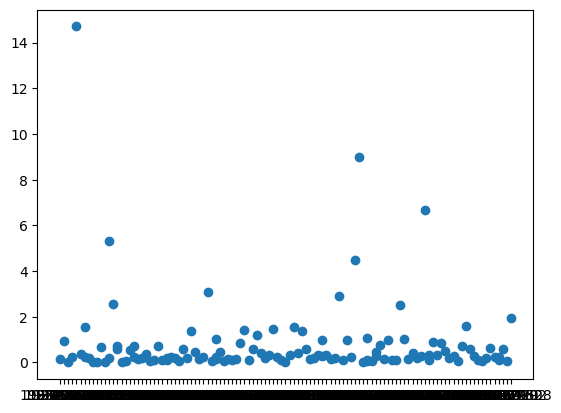

In [94]:
#plot data

#keep burned areas that are greater than 25% of the total watershed area
burn_df_1 = burn_df[burn_df['burn_percentage'] > 1]
one_df = burn_df.loc[burn_df['name'] == "Upper Gila"]
burn_df_1


# plt.scatter(burn_df_1.Ig_Date, burn_df_1.burn_percentage)
plt.scatter(one_df.Ig_Date, one_df.burn_percentage)

In [92]:
burn_df_1['name'].value_counts()

Upper Gila                      21
Santa Clara                     20
Middle Humboldt                 19
Cloverdale                      19
Rock                            18
                                ..
Frenchman                        1
Beaver                           1
Upper Arkansas-Lake Meredith     1
Huerfano                         1
Pecos Headwaters                 1
Name: name, Length: 306, dtype: int64